In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit
from pybaselines import Baseline
from pybaselines.utils import gaussian

In [2]:
#Uploading the test data set

data = pd.read_csv("data/data_t1m.csv", comment='#',sep=',')
data.head()

,Size in nt in L1,Grey Values
0,120.970000,9583.214
1,120.760747,9639.429
2,120.551856,9741.571
3,120.343327,9792.357
4,120.135158,9878.357


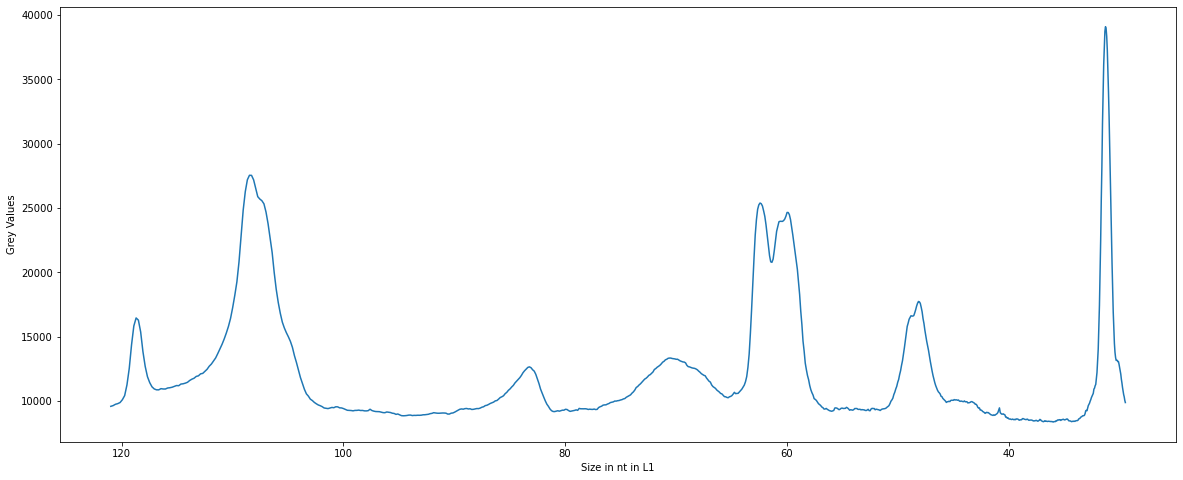

In [3]:
#Plotting the initial data

plt.figure(figsize=(20, 8))
plot = plt.plot(data['Size in nt in L1'], data['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

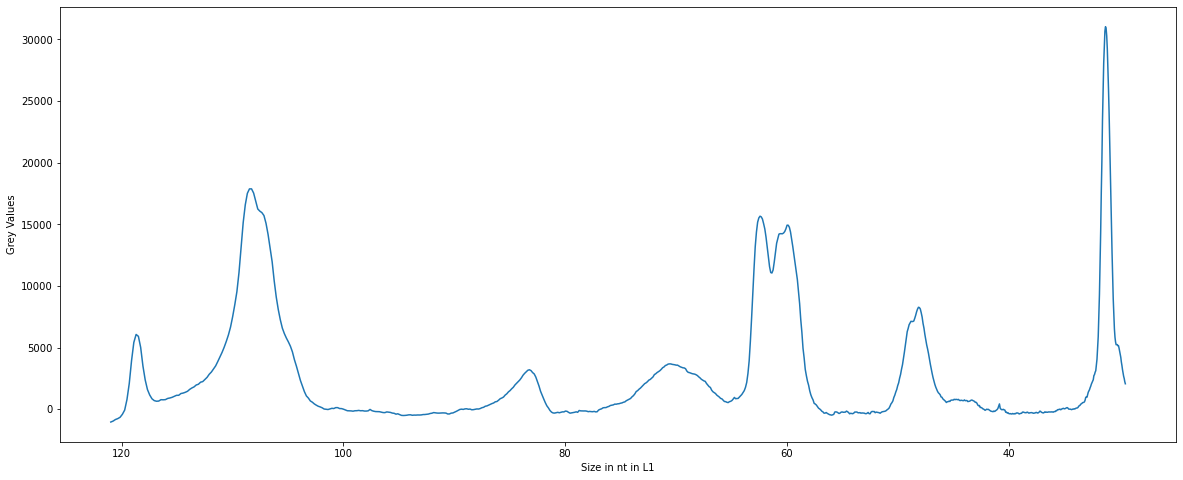

In [5]:
baseline_fitter = Baseline(x_data=data['Size in nt in L1'])
imodpoly = baseline_fitter.imodpoly(data['Grey Values'], poly_order=3, num_std=0.8)
new_y = data['Grey Values']-imodpoly[0]
plt.figure(figsize=(20, 8))
initial_plot = plt.plot(data['Size in nt in L1'], new_y)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [6]:
#Creating a new dataframe with new grey values

data1 = data['Size in nt in L1']
data_grey = new_y.to_frame(name="Grey Values")
df = pd.concat([data1, data_grey], axis=1)

#converting negative values to 0 → for plotting bar charts (histograms)
df[df < 0] = 0

In [7]:
# Cutting off the markers:

cut_data=df[19:620]
cut_data

,Size in nt in L1,Grey Values
19,117.055491,698.334295
20,116.853009,646.935775
21,116.650878,660.575727
22,116.449096,771.468465
23,116.247664,762.546281
...,...,...
615,41.712475,0.000000
616,41.640321,0.000000
617,41.568292,0.000000
618,41.496388,0.000000


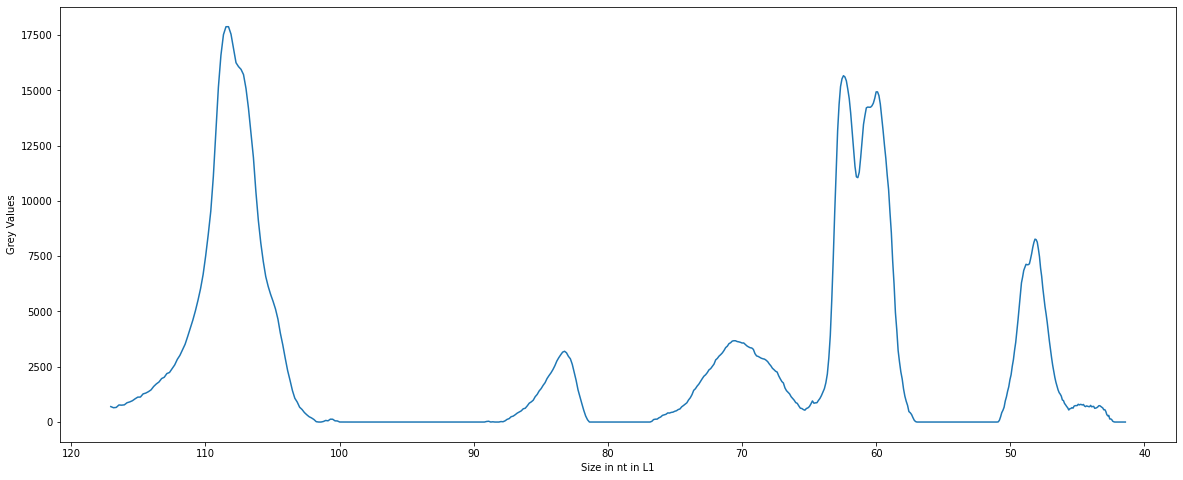

In [8]:
plt.figure(figsize=(20, 8))
plot = plt.plot(cut_data['Size in nt in L1'], cut_data['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import auc

xx = cut_data['Size in nt in L1']
yy = cut_data['Grey Values']

total_area= auc(xx,yy)

print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))

computed AUC using sklearn.metrics.auc: 204857.4221278713


In [10]:
# Cutting out peaks: 

#Finding peak values:
peaks, values = find_peaks(cut_data['Grey Values'], height=2000)
peaks

array([ 45, 197, 292, 298, 363, 380, 386, 505, 513], dtype=int64)

In [11]:
values.values()

dict_values([array([17876.67830409,  3199.68904296,  3675.9079855 ,  3576.13281562,
       15660.28888557, 14242.14459929, 14929.31577453,  7132.26251844,
        8270.10359147])])

In [12]:
peak_values = cut_data.iloc[peaks, 0]
peak_values

64     108.282129
216     83.228039
311     70.605773
317     69.876135
382     62.439022
399     60.628103
405     60.001574
524     48.830127
532     48.158477
Name: Size in nt in L1, dtype: float64

In [13]:
peak_values.to_numpy()
peak_values.shape

(9,)

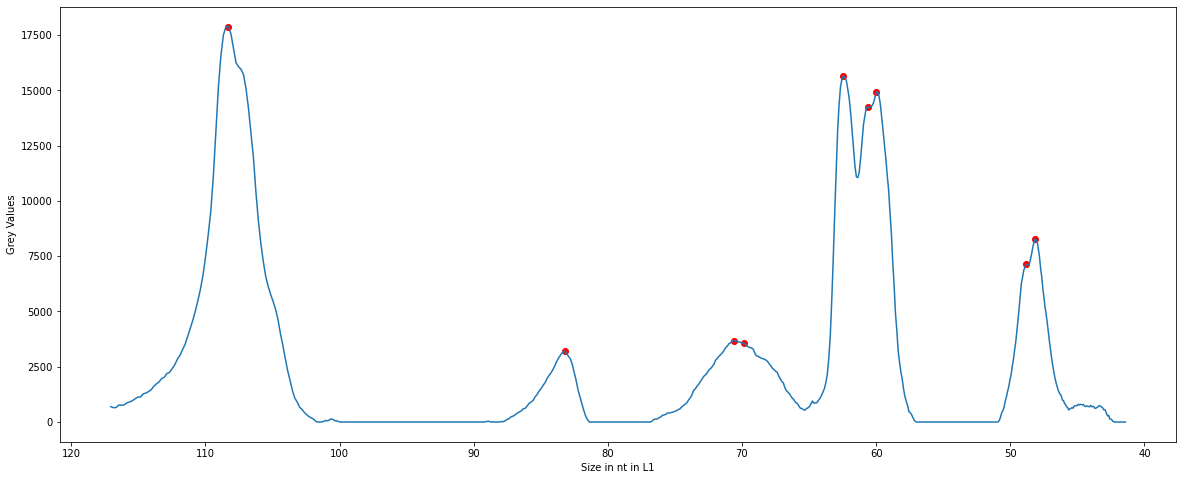

In [14]:
plt.figure(figsize=(20, 8))
plot = plt.plot(cut_data['Size in nt in L1'], cut_data['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.scatter(peak_values, values.values(), color='red')
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

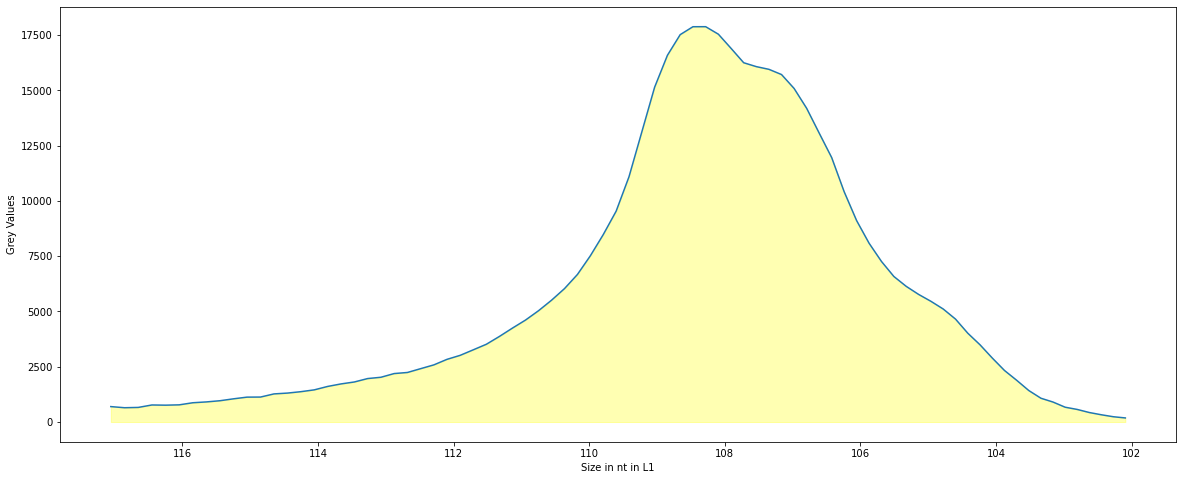

Area under the curve: 86033.38294971889


In [15]:
peak1=cut_data[0:80]
plt.figure(figsize=(20, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'])
plt.fill_between(peak1['Size in nt in L1'], peak1['Grey Values'], color='yellow', alpha=0.3)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

xx = peak1['Size in nt in L1']
yy = peak1['Grey Values']
peak1_area= auc(xx,yy)

print('Area under the curve: {}'.format(auc(xx,yy)))

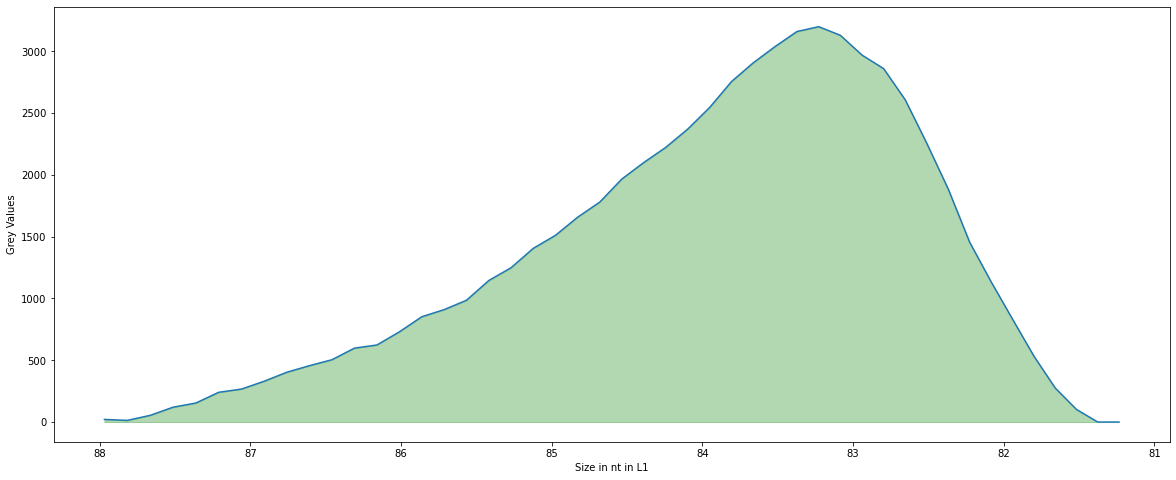

Area under the curve: 9048.426539439144


In [16]:
peak2=cut_data[165:212]
plt.figure(figsize=(20, 8))
plot = plt.plot(peak2['Size in nt in L1'], peak2['Grey Values'])
plt.fill_between(peak2['Size in nt in L1'], peak2['Grey Values'], color='green', alpha=0.3)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

xx = peak2['Size in nt in L1']
yy = peak2['Grey Values']
peak2_area = auc(xx,yy)

print('Area under the curve: {}'.format(auc(xx,yy)))

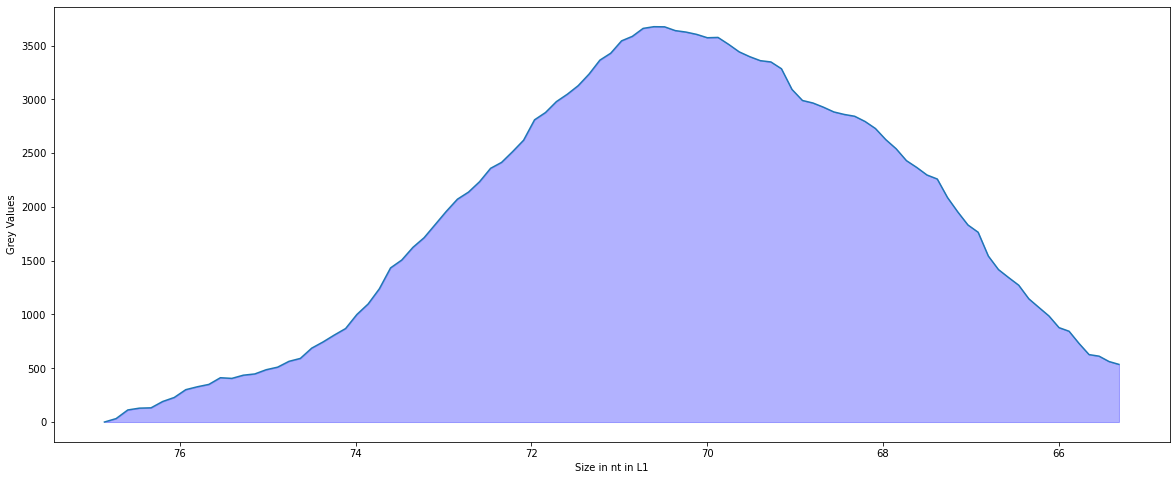

Area under the curve: 22037.77150326661


In [17]:
peak3=cut_data[243:338]
plt.figure(figsize=(20, 8))
plot = plt.plot(peak3['Size in nt in L1'], peak3['Grey Values'])
plt.fill_between(peak3['Size in nt in L1'], peak3['Grey Values'], color='blue', alpha=0.3)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

xx = peak3['Size in nt in L1']
yy = peak3['Grey Values']
peak3_area = auc(xx,yy)

print('Area under the curve: {}'.format(auc(xx,yy)))

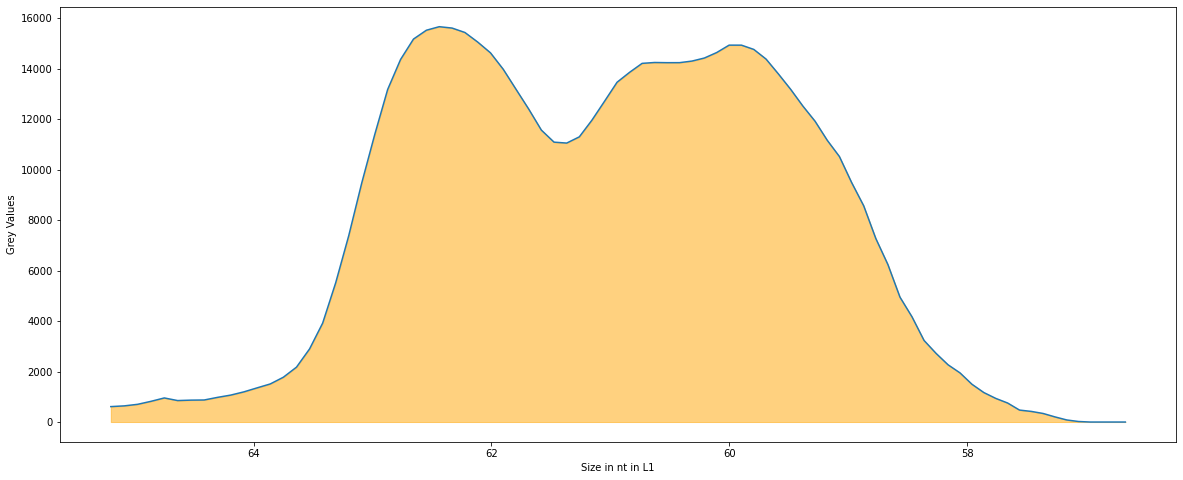

Area under the curve: 65136.56576144915


In [18]:
peak4=cut_data[338:420]
plt.figure(figsize=(20, 8))
plot = plt.plot(peak4['Size in nt in L1'], peak4['Grey Values'])
plt.fill_between(peak4['Size in nt in L1'], peak4['Grey Values'], color='orange', alpha=0.5)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

xx = peak4['Size in nt in L1']
yy = peak4['Grey Values']
peak4_area = auc(xx,yy)

print('Area under the curve: {}'.format(auc(xx,yy)))

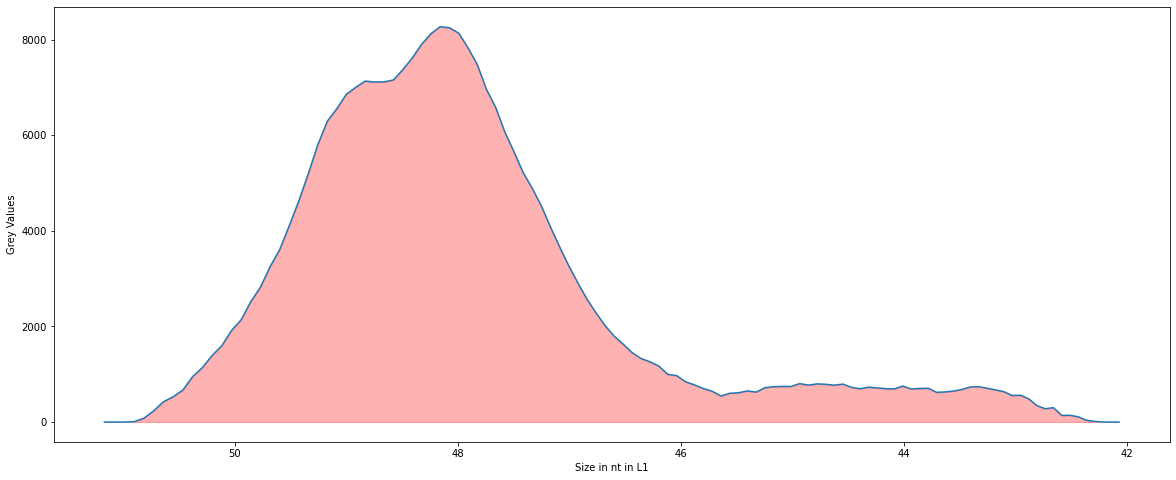

Area under the curve: 22395.160006650305


In [19]:
peak5=cut_data[478:592]
plt.figure(figsize=(20, 8))
plot = plt.plot(peak5['Size in nt in L1'], peak5['Grey Values'])
plt.fill_between(peak5['Size in nt in L1'], peak5['Grey Values'], color='red', alpha=0.3)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

xx = peak5['Size in nt in L1']
yy = peak5['Grey Values']
peak5_area = auc(xx,yy)

print('Area under the curve: {}'.format(auc(xx,yy)))